In [1]:
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import ScalarFormatter

import numpy as np
import pandas as pd

import seaborn as sns

In [2]:
sns.set_style('ticks')
sns.set_context('paper')

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.titlesize'] = 10
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['lines.markersize'] = 3
matplotlib.rcParams['lines.linewidth'] = 1

pd.options.display.width = 200


In [3]:
cols = ["pmid", "year", "TFirstP", "VolFirstP", "Pair_TFirstP", "Pair_VolFirstP", "num_mesh", "num_ex_mesh", 
       "mean_cites", "ncites", "normed_cites"]


In [7]:
df = pd.read_csv("out/pmid_novelty_all_scores_mesh_c.txt", sep="\t", header=None,
                names=cols,
                 na_values="\\N"
                )

In [8]:
df.head()

,,,pmid,year,TFirstP,VolFirstP,Pair_TFirstP,Pair_VolFirstP,num_mesh,num_ex_mesh,mean_cites,ncites,normed_cites
23199754,2012,18,9,121.0,0.240273,2.402730e-01,0.123020,2.685150e-08,1.0,0.0,1.0,9,27
21102603,2011,197,21,2386.0,0.000000,7.236510e-02,0.050997,0.000000e+00,1.0,0.0,1.0,23,118
19005452,2008,87,10,541.0,0.000000,1.010260e-01,0.017441,0.000000e+00,1.0,0.0,1.0,14,66
16908301,2006,17,3,71.0,0.000000,0.000000e+00,0.091700,5.286890e-37,1.0,0.0,1.0,13,45
14811150,1951,82,2,133.0,0.000000,1.138140e-09,NaN,NaN,1.0,0.0,1.0,3,17


In [9]:
df.dtypes

pmid                int64
year              float64
TFirstP           float64
VolFirstP         float64
Pair_TFirstP      float64
Pair_VolFirstP    float64
num_mesh          float64
num_ex_mesh       float64
mean_cites        float64
ncites              int64
normed_cites        int64
dtype: object

In [10]:
df = df.reset_index()

In [11]:
df.head()

,level_0,level_1,level_2,pmid,year,TFirstP,VolFirstP,Pair_TFirstP,Pair_VolFirstP,num_mesh,num_ex_mesh,mean_cites,ncites,normed_cites
0,23199754,2012,18,9,121.0,0.240273,2.402730e-01,0.123020,2.685150e-08,1.0,0.0,1.0,9,27
1,21102603,2011,197,21,2386.0,0.000000,7.236510e-02,0.050997,0.000000e+00,1.0,0.0,1.0,23,118
2,19005452,2008,87,10,541.0,0.000000,1.010260e-01,0.017441,0.000000e+00,1.0,0.0,1.0,14,66
3,16908301,2006,17,3,71.0,0.000000,0.000000e+00,0.091700,5.286890e-37,1.0,0.0,1.0,13,45
4,14811150,1951,82,2,133.0,0.000000,1.138140e-09,NaN,NaN,1.0,0.0,1.0,3,17


In [12]:
df.columns = ["PMID", "Year", "AbsVal", "TFirstP", "VolFirstP",
           "acc_pos_vel_min", "acc_pos_vel_max", "acc_neg_vel_max", "acc_neg_vel_min",
           "Pair_AbsVal", "Pair_TFirstP", "Pair_VolFirstP", "Mesh_counts", "Exploded_Mesh_counts"]

In [13]:
df.head()

,PMID,Year,AbsVal,TFirstP,VolFirstP,acc_pos_vel_min,acc_pos_vel_max,acc_neg_vel_max,acc_neg_vel_min,Pair_AbsVal,Pair_TFirstP,Pair_VolFirstP,Mesh_counts,Exploded_Mesh_counts
0,23199754,2012,18,9,121.0,0.240273,2.402730e-01,0.123020,2.685150e-08,1.0,0.0,1.0,9,27
1,21102603,2011,197,21,2386.0,0.000000,7.236510e-02,0.050997,0.000000e+00,1.0,0.0,1.0,23,118
2,19005452,2008,87,10,541.0,0.000000,1.010260e-01,0.017441,0.000000e+00,1.0,0.0,1.0,14,66
3,16908301,2006,17,3,71.0,0.000000,0.000000e+00,0.091700,5.286890e-37,1.0,0.0,1.0,13,45
4,14811150,1951,82,2,133.0,0.000000,1.138140e-09,NaN,NaN,1.0,0.0,1.0,3,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa236ba4790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa236399b90>]], dtype=object)

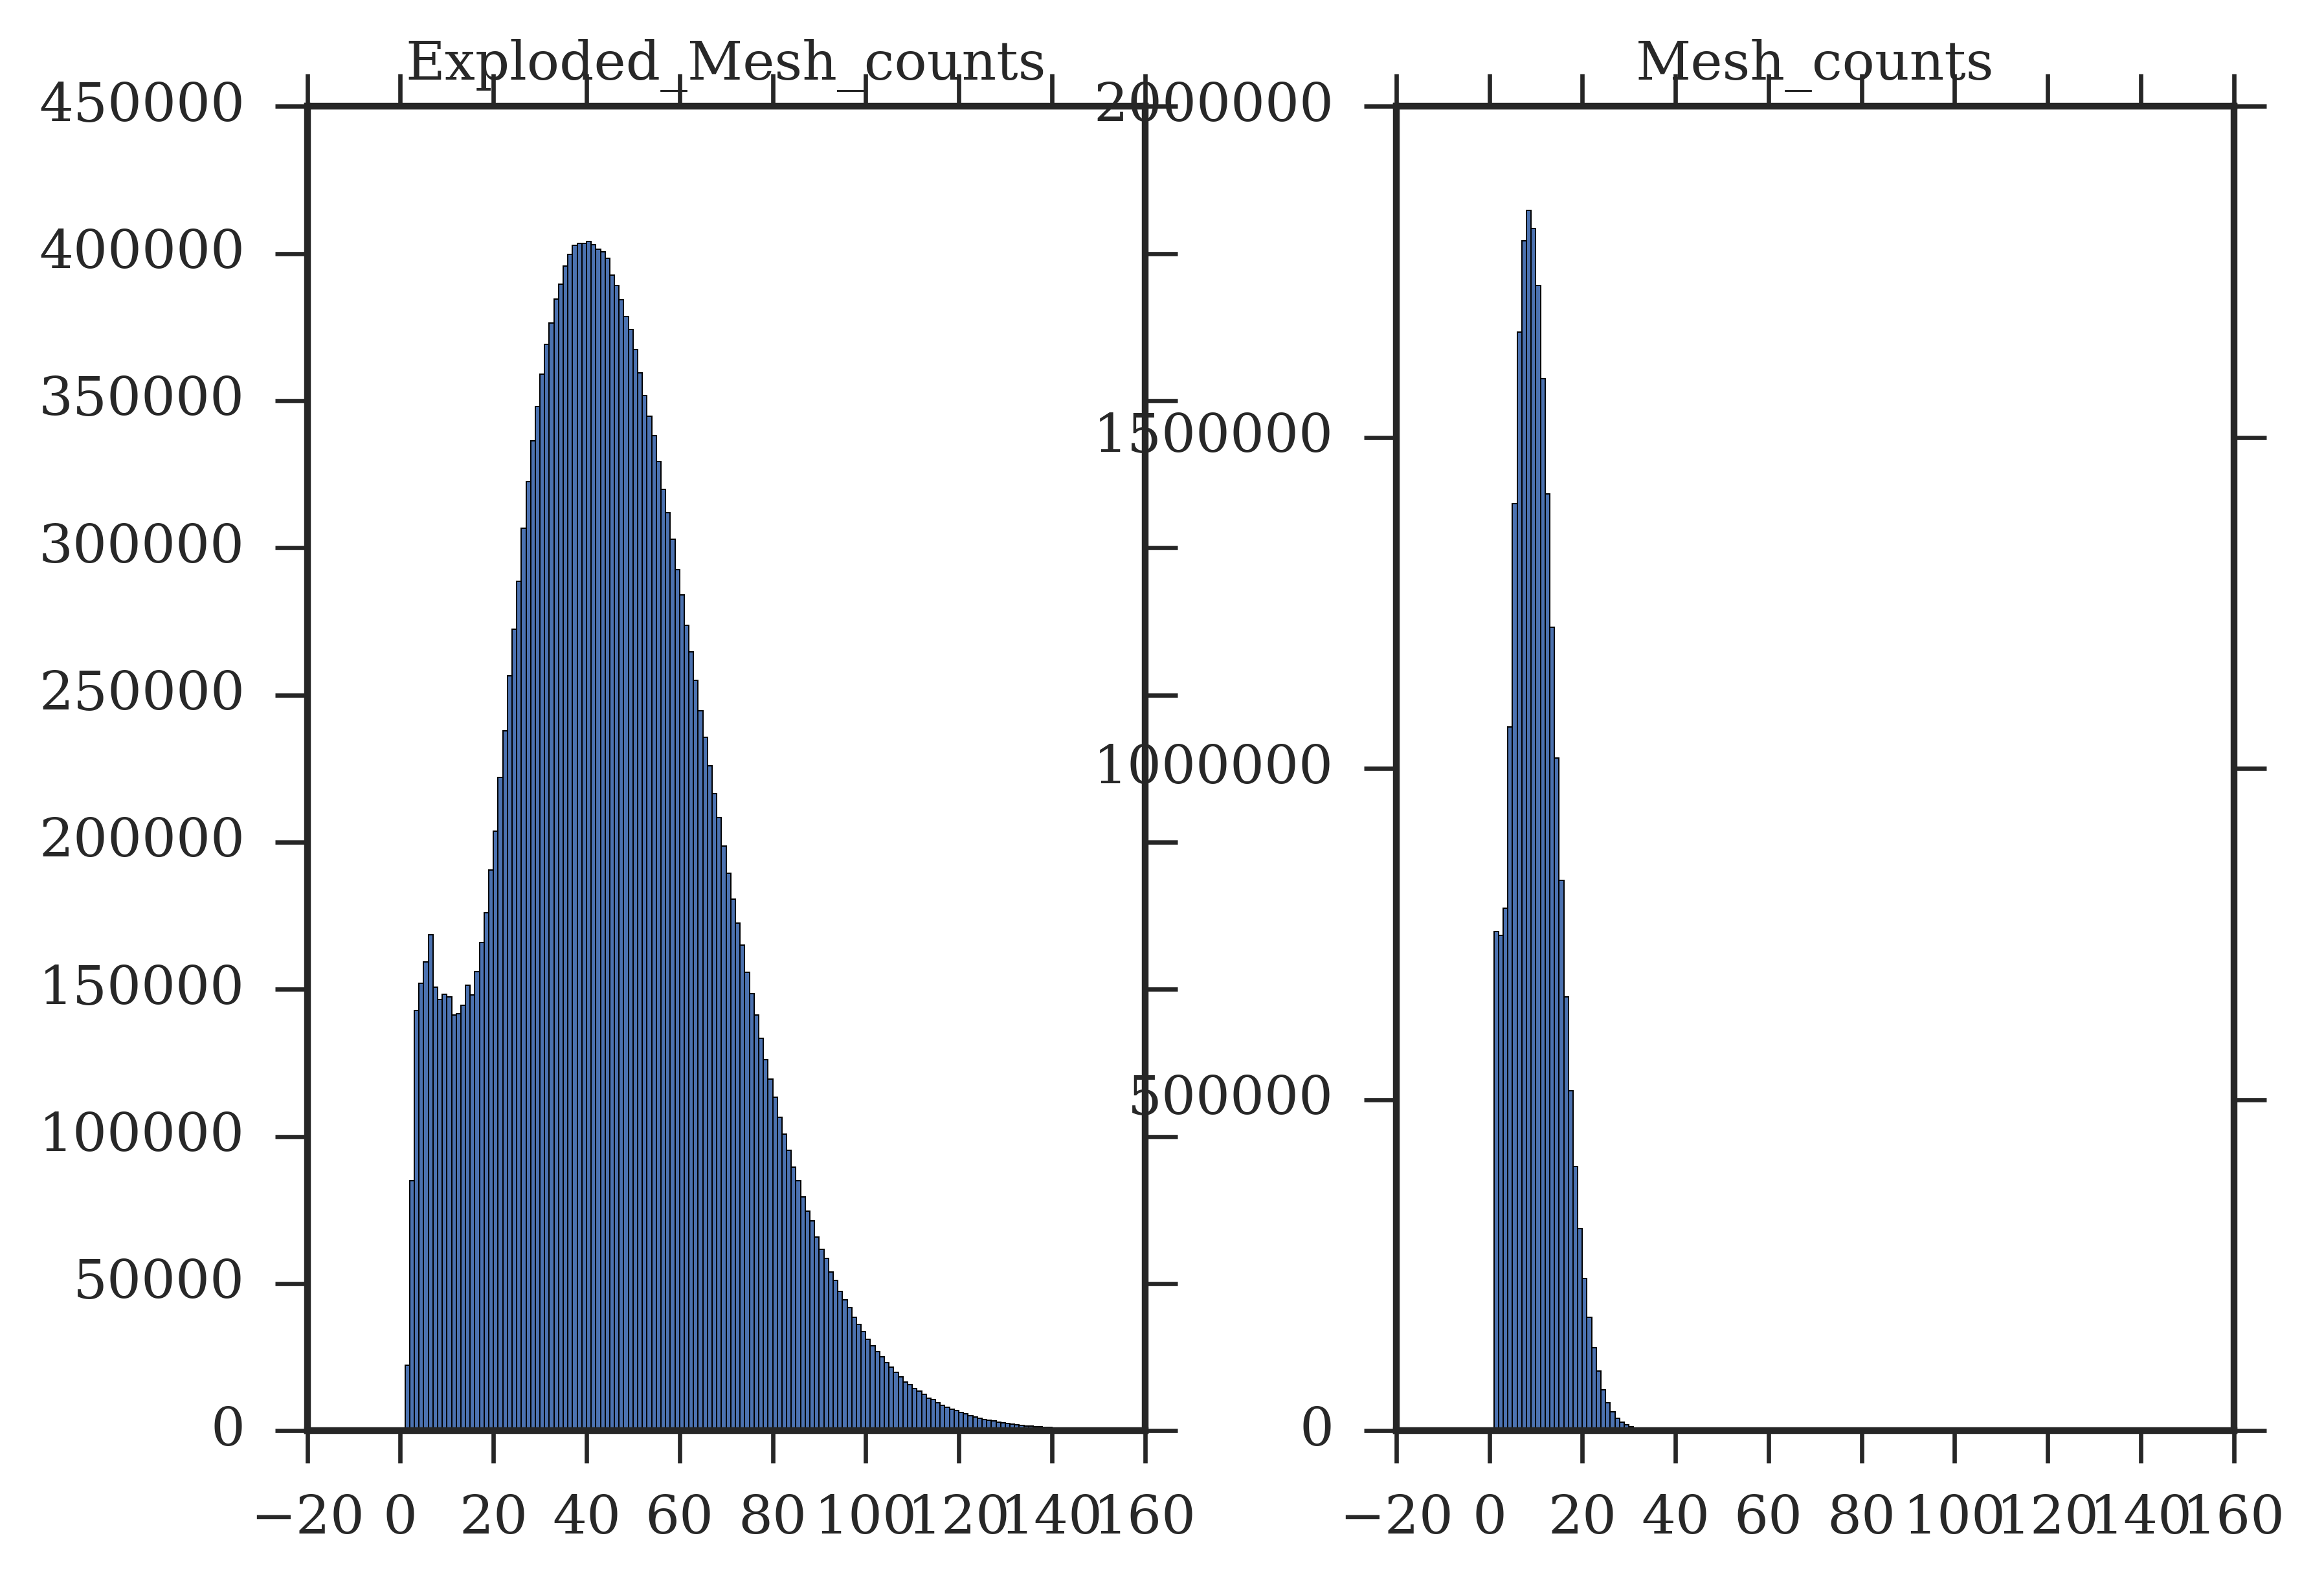

In [24]:
df.hist(["Mesh_counts", "Exploded_Mesh_counts"], bins=range(-1,150), grid=False,)

In [23]:
df[["Mesh_counts", "Exploded_Mesh_counts"]].describe()

,Mesh_counts,Exploded_Mesh_counts
count,2.234942e+07,2.234942e+07
mean,9.579647e+00,4.558257e+01
std,4.978129e+00,2.285986e+01
min,1.000000e+00,1.000000e+00
25%,6.000000e+00,3.000000e+01
50%,9.000000e+00,4.400000e+01
75%,1.300000e+01,6.000000e+01
max,1.030000e+02,3.110000e+02
